In [1]:
import os
import math
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()

np.random.seed(0)

In [131]:
data = 'data_apr_1'
path_file = os.sep.join([data, 'studium_dim.csv'])
studium_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data, 'student_dim.csv'])
student_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data, 'predmet_dim.csv'])
predmet_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join([data, 'prihlaska_dim.csv'])
prihlaska_dim = pd.read_csv(path_file, sep=";")

path_file = os.sep.join(['created_data', 'klasifikace_fact_changed.csv'])
klasifikace_fact_changed = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'studium_dim_changed.csv'])
studium_dim_changed = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'matrix_bak.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'matrix_mag.csv'])
matrix_mag = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'courses_matrix_bak.csv'])
courses_matrix_bak = pd.read_csv(path_file)

path_file = os.sep.join(['created_data', 'courses_matrix_mag.csv'])
courses_matrix_mag = pd.read_csv(path_file)

path_file = os.sep.join(['created_data', 'failed_students_bak.npy'])
failed_students_bak = np.load(path_file)
path_file = os.sep.join(['created_data', 'successful_students_bak.npy'])
successful_students_bak = np.load(path_file)

path_file = os.sep.join(['created_data', 'failed_students_mag.npy'])
failed_students_mag = np.load(path_file)
path_file = os.sep.join(['created_data', 'successful_students_mag.npy'])
successful_students_mag = np.load(path_file)

path_file = os.sep.join(['created_data', 'klasifikace_fact_bak_09.csv'])
klasifikace_fact_bak_09 = pd.read_csv(path_file, sep=",")
path_file = os.sep.join(['created_data', 'klasifikace_fact_mag_09.csv'])
klasifikace_fact_mag_09 = pd.read_csv(path_file, sep=",")

path_file = os.sep.join(['created_data', 'courses_tran_id_kod.pkl'])
file = open(path_file, 'rb')
courses_tran_id_kod = pickle.load(file)

path_file = os.sep.join(['created_data', 'courses_tran_kod_id.pkl'])
file = open(path_file, 'rb')
courses_tran_kod_id = pickle.load(file)

In [3]:
courses_matrix_bak = courses_matrix_bak.set_index('studium_id')
courses_matrix_mag = courses_matrix_mag.set_index('studium_id')

### Vyplněnost prihlaska_dim

In [137]:
prihl_studium = prihlaska_dim.merge(studium_dim_changed, how='inner', on='studium_id')

<BarContainer object of 14 artists>

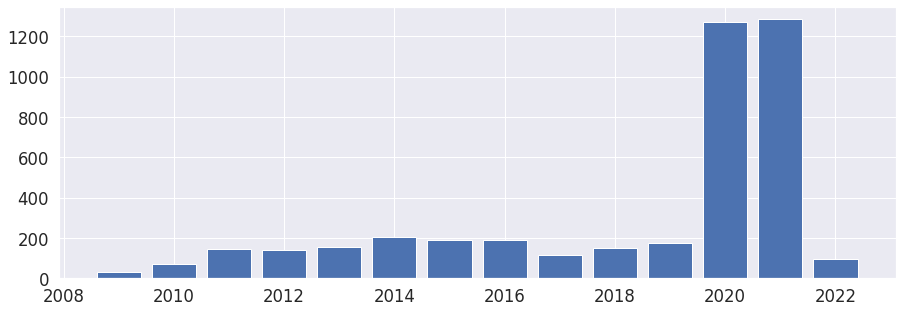

In [154]:
plt.figure(figsize=(15,5))

x = np.array(prihl_studium.datum_zahajeni.value_counts().sort_index().index)
y = np.array(prihl_studium.datum_zahajeni.value_counts().sort_index().values)

plt.grid(True)
#for index, value in enumerate(y):
#    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.xticks(xValues)   
plt.bar(x, y)

<BarContainer object of 2 artists>

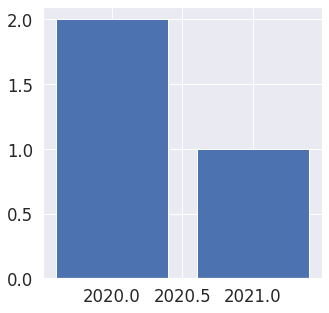

In [157]:
plt.figure(figsize=(5,5))

x = np.array(prihl_studium[prihl_studium.ss_prumer_prumeru.notna()].datum_zahajeni.value_counts().sort_index().index)
y = np.array(prihl_studium[prihl_studium.ss_prumer_prumeru.notna()].datum_zahajeni.value_counts().sort_index().values)

plt.grid(True)
#for index, value in enumerate(y):
#    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')
 
plt.bar(x, y)

### Počet neúspěšných studentů bakalářského studia v závislosti na ročníku, ve kterém končí

#### Bakalář

<BarContainer object of 8 artists>

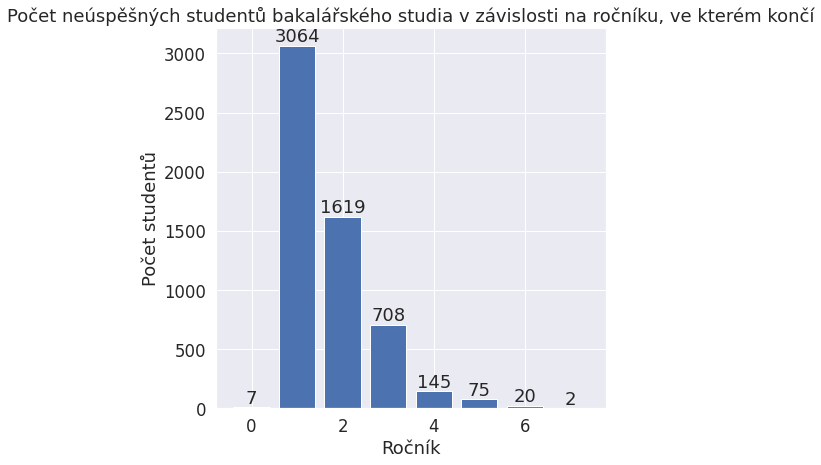

In [148]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_bak)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_bak)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Počet neúspěšných studentů bakalářského studia v závislosti na ročníku, ve kterém končí')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='medium')

plt.bar(x, y)

#### Magistr

<BarContainer object of 5 artists>

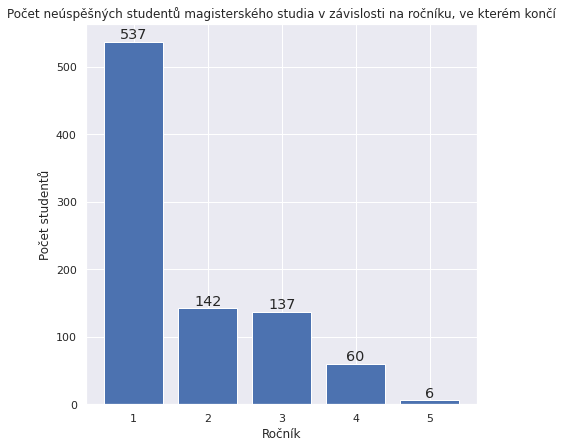

In [5]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_mag)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(failed_students_mag)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Počet neúspěšných studentů magisterského studia v závislosti na ročníku, ve kterém končí')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index + 1, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

### Ročník, ve kterém studenti ukončí úspěšně studium

#### Bakalář

<BarContainer object of 6 artists>

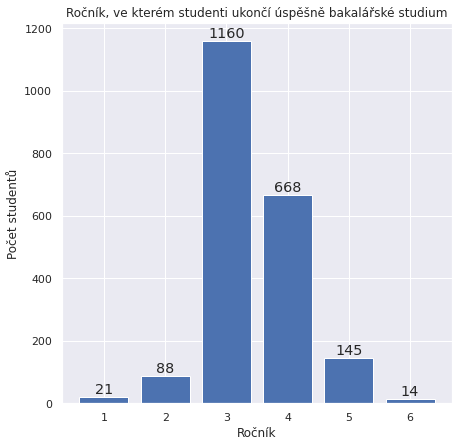

In [6]:
plt.figure(figsize=(7,7))

x = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_bak)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_bak)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Ročník, ve kterém studenti ukončí úspěšně bakalářské studium')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index + 1, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

#### Magistr

<BarContainer object of 5 artists>

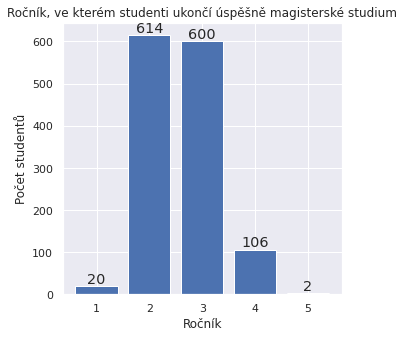

In [7]:
plt.figure(figsize=(5,5))

x = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_mag)]['rocnik'].value_counts().sort_index().index)
y = np.array(studium_dim[studium_dim.studium_id.isin(successful_students_mag)]['rocnik'].value_counts().sort_index().values)

plt.xlabel('Ročník')
plt.ylabel('Počet studentů')
plt.title('Ročník, ve kterém studenti ukončí úspěšně magisterské studium')
plt.grid(True)
for index, value in enumerate(y):
    plt.text(index + 1, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.bar(x, y)

## Úspěch a neúspěch studentů podle roku nástupu

In [8]:
studium_dim_c = studium_dim.copy(deep=True
                                )
# zmena datum_zahajeni pouze na rok a zmena ze stringu na int
studium_dim_c['datum_zahajeni'] = studium_dim_c['datum_zahajeni'].apply(lambda x: x.split('-')[0])

studium_dim_c['datum_ukonceni'] = studium_dim_c['datum_ukonceni'].fillna('0')
studium_dim_c['datum_ukonceni'] = studium_dim_c['datum_ukonceni'].apply(lambda x: x.split('-')[0])

studium_dim_c['rok_maturity'] = studium_dim_c['rok_maturity'].fillna('0')
studium_dim_c['rok_maturity'] = studium_dim_c['rok_maturity'].apply(lambda x: x.split('-')[0])

studium_dim_c['datum_zahajeni'] = pd.to_numeric(studium_dim_c['datum_zahajeni'])
studium_dim_c['datum_ukonceni'] = pd.to_numeric(studium_dim_c['datum_ukonceni'])
studium_dim_c['rok_maturity'] = pd.to_numeric(studium_dim_c['rok_maturity'])

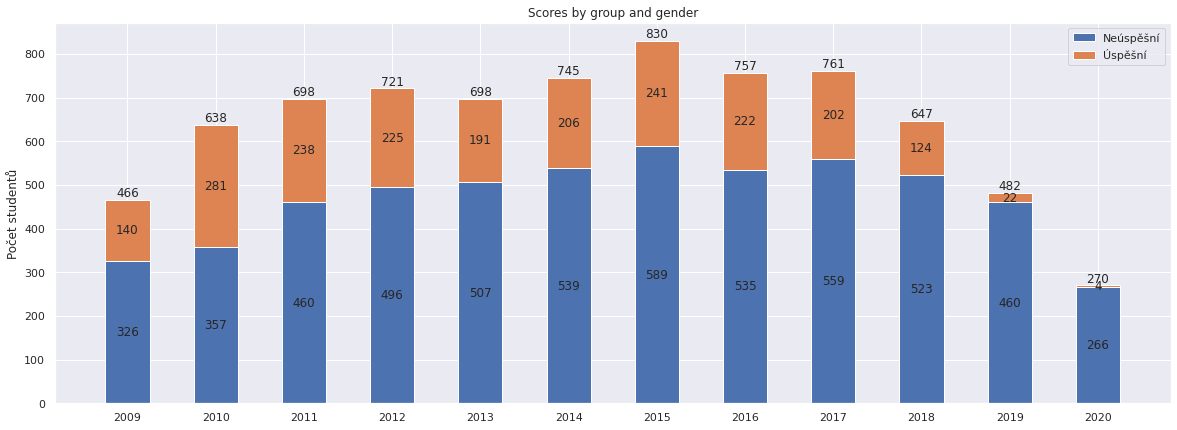

In [9]:
succ_stud = np.array(studium_dim_c[
    (studium_dim_c.studium_id.isin(successful_students_bak))
    & (studium_dim_c.datum_zahajeni != 2021)]['datum_zahajeni'].value_counts().sort_index().values)
fail_stud = np.array(studium_dim_c[
    (studium_dim_c.studium_id.isin(failed_students_bak))
    & (studium_dim_c.datum_zahajeni != 2021)]['datum_zahajeni'].value_counts().sort_index().values)

fig, ax = plt.subplots()
labels = studium_dim_c[studium_dim_c.datum_zahajeni != 2021].datum_zahajeni.sort_values(ascending=True).unique()
width = 0.5
ind = np.arange(len(labels))
p1 = ax.bar(ind, fail_stud, width, label='Neúspěšní')
p2 = ax.bar(ind, succ_stud, width,
            bottom=fail_stud, label='Úspěšní')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Počet studentů')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)
fig.set_size_inches(20,7)

plt.show()

### Rozdíl mezi rokem maturity a rokem nástupu v letech

#### Bakalář

<AxesSubplot:title={'center':'Rozdíl mezi rokem maturity a rokem nástupu v letech'}, xlabel='Rozdíl v letech', ylabel='Počet studentů'>

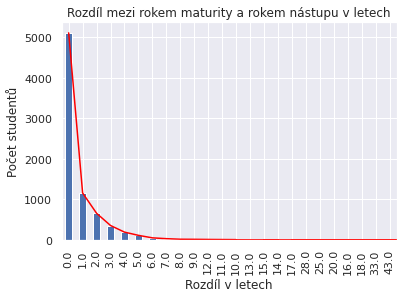

In [10]:
ax = matrix_bak.maturita_nastup_rozdil.value_counts().plot(color='red')
ax.set_xlabel('Rozdíl v letech')
ax.set_ylabel('Počet studentů')
matrix_bak.maturita_nastup_rozdil.value_counts().plot.bar(ax=ax, title='Rozdíl mezi rokem maturity a rokem nástupu v letech')

### Úspěšnost studentů v souvislosti s rozdílem mezi rokem maturity a nástupu do studia - Bakalář

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: Matpl

<AxesSubplot:title={'center':'Více než 10 let'}, ylabel='dostudoval_uspesne'>

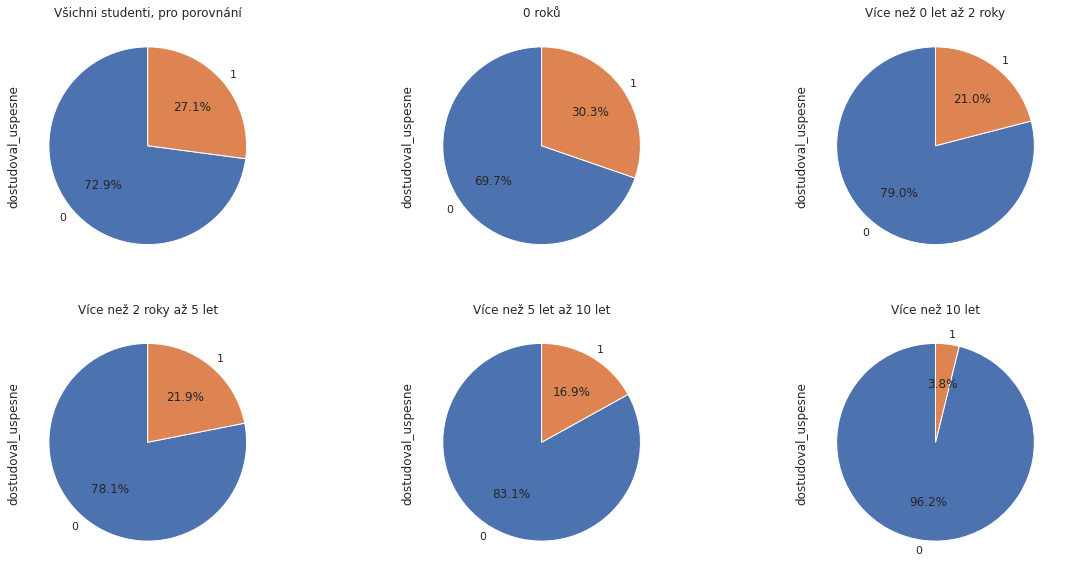

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(231)
matrix_bak.dostudoval_uspesne.value_counts().plot.pie(title="Všichni studenti, pro porovnání", 
                                                      startangle=90, autopct='%1.1f%%')
plt.subplot(232)
matrix_bak[matrix_bak.maturita_nastup_rozdil == 0].dostudoval_uspesne.value_counts().plot.pie(title="0 roků", 
                                                                                              startangle=90, autopct='%1.1f%%')
plt.subplot(233)
matrix_bak[(matrix_bak.maturita_nastup_rozdil != 0)
          & (matrix_bak.maturita_nastup_rozdil <= 2)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 0 let až 2 roky",
                                                                                                 startangle=90, autopct='%1.1f%%')
plt.subplot(234)
matrix_bak[(matrix_bak.maturita_nastup_rozdil > 2)
          & (matrix_bak.maturita_nastup_rozdil <= 5)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 2 roky až 5 let", 
                                                                                                 startangle=90, autopct='%1.1f%%')
plt.subplot(235)
matrix_bak[(matrix_bak.maturita_nastup_rozdil > 5)
          & (matrix_bak.maturita_nastup_rozdil <= 10)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 5 let až 10 let", 
                                                                                                  startangle=90, autopct='%1.1f%%')
plt.subplot(236)
matrix_bak[(matrix_bak.maturita_nastup_rozdil > 10)].dostudoval_uspesne.value_counts().plot.pie(title="Více než 10 let", 
                                                                                                startangle=90, autopct='%1.1f%%')

### Úspěšnost studentů s českou příslušností a úspěšnost studentů s cizí státní příslušností

#### Bakalář

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'cizí státní příslušnost'}, ylabel='dostudoval_uspesne'>

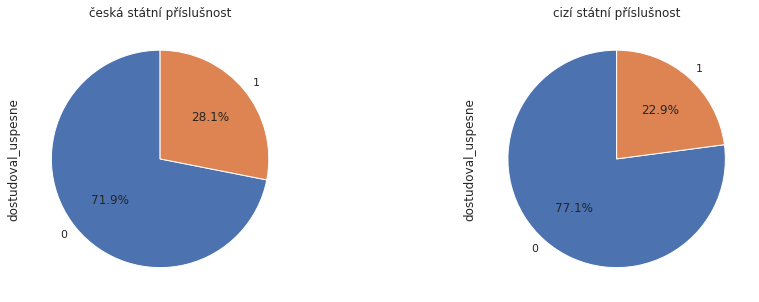

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_bak[(matrix_bak.je_cech == 1)].dostudoval_uspesne.value_counts().plot.pie(title="česká státní příslušnost", startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_bak[(matrix_bak.je_cech == 0)].dostudoval_uspesne.value_counts().plot.pie(title="cizí státní příslušnost", startangle=90, autopct='%1.1f%%')

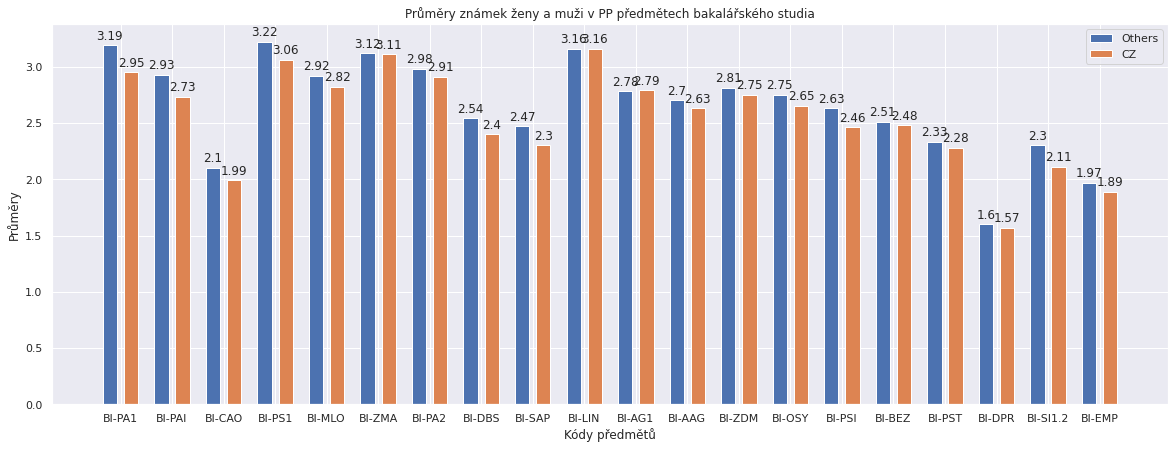

In [13]:
width = 0.35 

cz_bak_id = matrix_bak[matrix_bak.je_cech == 1].studium_id.unique()
cz_bak = courses_matrix_bak[courses_matrix_bak.index.isin(cz_bak_id)]

oth_bak_id = matrix_bak[matrix_bak.je_cech == 0].studium_id.unique()
oth_bak = courses_matrix_bak[courses_matrix_bak.index.isin(oth_bak_id)]

labels = np.array(courses_matrix_bak.columns)
oth_means = np.array(round(oth_bak.mean(), 2).values)
cz_means = np.array(round(cz_bak.mean(), 2).values)

x = np.arange(len(labels))*1.8  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.12, oth_means, width, label='Others')
rects2 = ax.bar(x + width/2 + 0.12, cz_means, width, label='CZ')

ax.set_ylabel('Průměry')
ax.set_xlabel('Kódy předmětů')
ax.set_title('Průměry známek ženy a muži v PP předmětech bakalářského studia')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_size_inches(20,7)
plt.show()

#### Magistr

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'cizí státní příslušnost'}, ylabel='dostudoval_uspesne'>

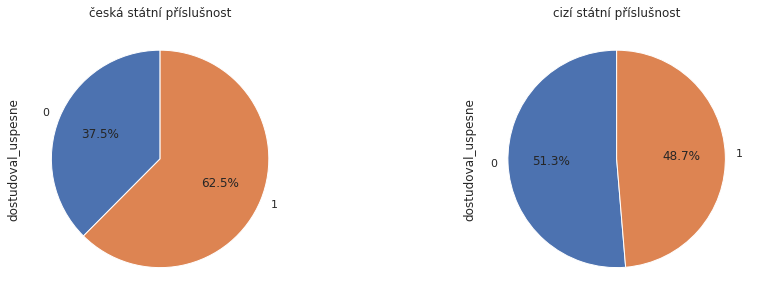

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_mag[(matrix_mag.je_cech == 1)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="česká státní příslušnost", 
                                                                                 startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_mag[(matrix_mag.je_cech == 0)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="cizí státní příslušnost", 
                                                                                 startangle=90, autopct='%1.1f%%')

### Úspěšnost studentů v souvislosti s pohlavím

#### Bakalář

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Ženy'}, ylabel='dostudoval_uspesne'>

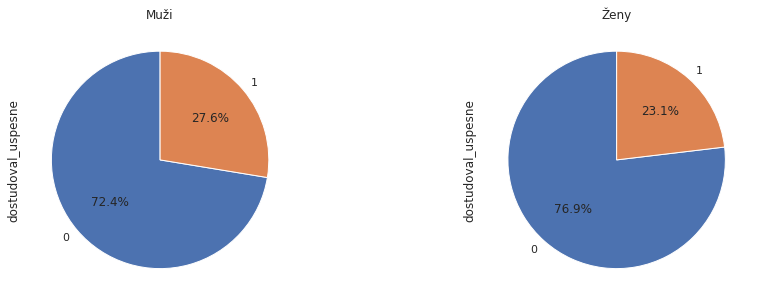

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_bak[(matrix_bak.pohlavi_kod == 0)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Muži", startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_bak[(matrix_bak.pohlavi_kod == 1)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Ženy", startangle=90, autopct='%1.1f%%')

Text(0.5, 1.0, 'Průměry známek žen v PP předmětech bakalářského studia')

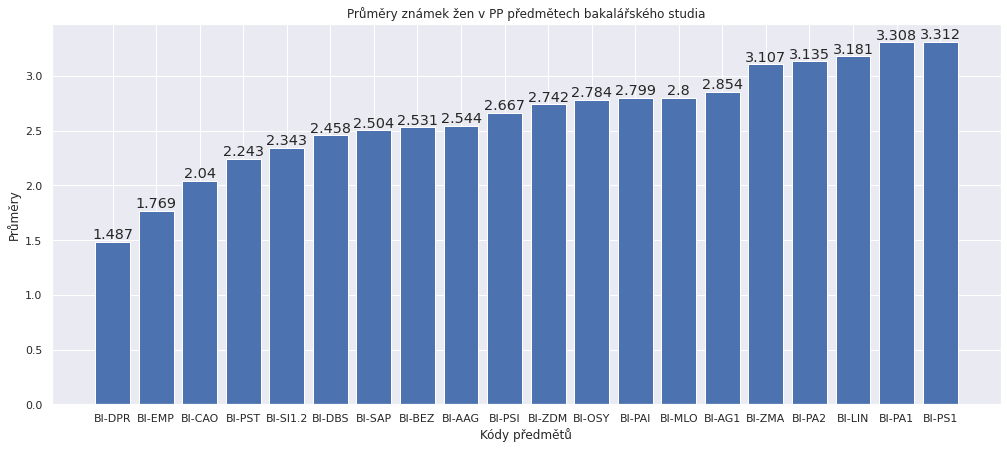

In [16]:
women_bak_id = matrix_bak[matrix_bak.pohlavi_kod == 1].studium_id.unique()
women_bak = courses_matrix_bak[courses_matrix_bak.index.isin(women_bak_id)]

plt.figure(figsize=(17,7))

x = np.array(round(women_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(women_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek žen v PP předmětech bakalářského studia')

Text(0.5, 1.0, 'Průměry známek muži v PP předmětech bakalářského studia')

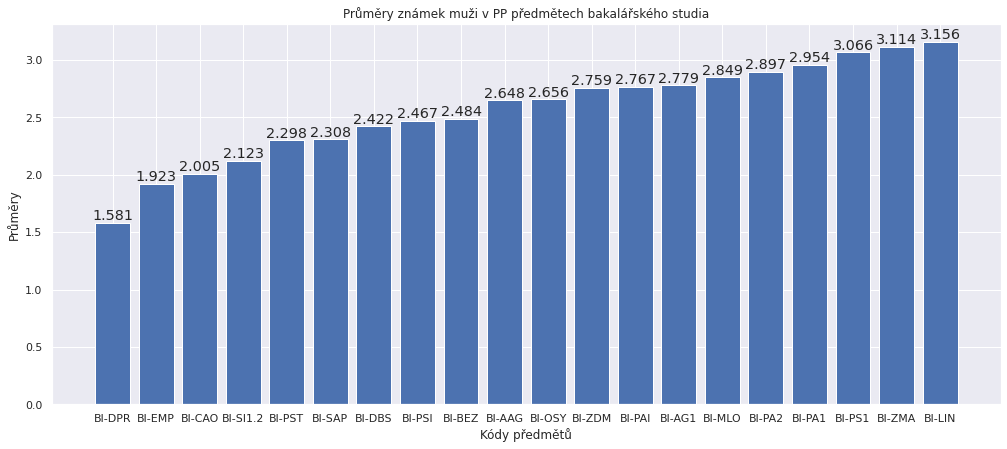

In [17]:
men_bak_id = matrix_bak[matrix_bak.pohlavi_kod == 0].studium_id.unique()
men_bak = courses_matrix_bak[courses_matrix_bak.index.isin(men_bak_id)]

plt.figure(figsize=(17,7))

x = np.array(round(men_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(men_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek muži v PP předmětech bakalářského studia')

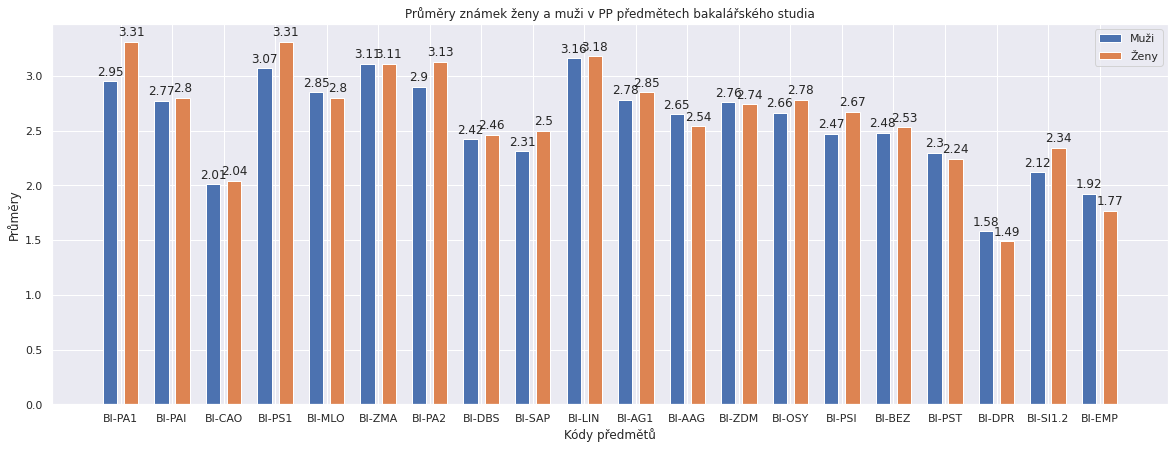

In [18]:
width = 0.35 

women_bak_id = matrix_bak[matrix_bak.pohlavi_kod == 1].studium_id.unique()
women_bak = courses_matrix_bak[courses_matrix_bak.index.isin(women_bak_id)]

men_bak_id = matrix_bak[matrix_bak.pohlavi_kod == 0].studium_id.unique()
men_bak = courses_matrix_bak[courses_matrix_bak.index.isin(men_bak_id)]

labels = np.array(courses_matrix_bak.columns)
men_means = np.array(round(men_bak.mean(), 2).values)
women_means = np.array(round(women_bak.mean(), 2).values)

x = np.arange(len(labels))*1.8  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.12, men_means, width, label='Muži')
rects2 = ax.bar(x + width/2 + 0.12, women_means, width, label='Ženy')

ax.set_ylabel('Průměry')
ax.set_xlabel('Kódy předmětů')
ax.set_title('Průměry známek ženy a muži v PP předmětech bakalářského studia')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_size_inches(20,7)
plt.show()

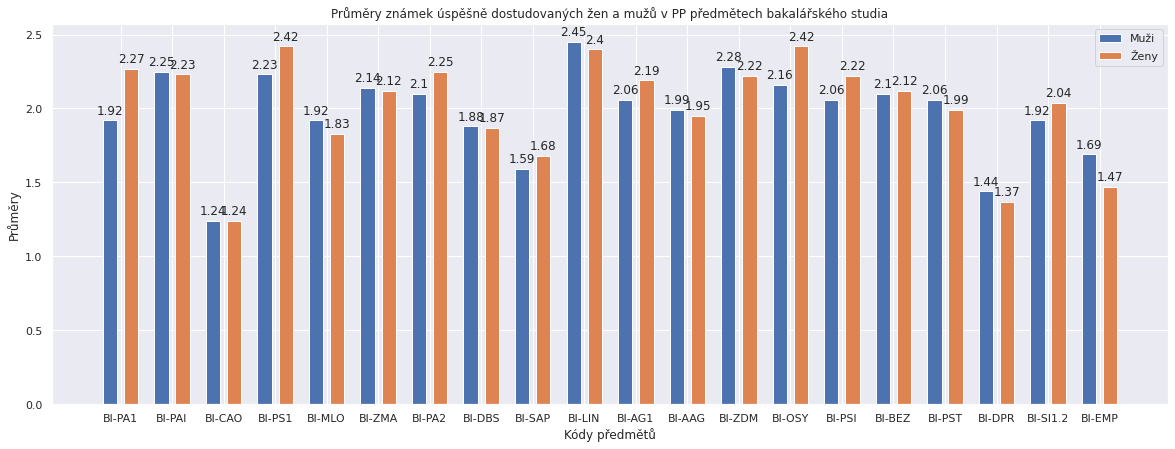

In [19]:
width = 0.35 

women_bak_id = matrix_bak[(matrix_bak.pohlavi_kod == 1)
                         & (matrix_bak.dostudoval_uspesne == 1)].studium_id.unique()
women_bak = courses_matrix_bak[courses_matrix_bak.index.isin(women_bak_id)]

men_bak_id = matrix_bak[(matrix_bak.pohlavi_kod == 0)
                         & (matrix_bak.dostudoval_uspesne == 1)].studium_id.unique()
men_bak = courses_matrix_bak[courses_matrix_bak.index.isin(men_bak_id)]

labels = np.array(courses_matrix_bak.columns)
men_means = np.array(round(men_bak.mean(), 2).values)
women_means = np.array(round(women_bak.mean(), 2).values)

x = np.arange(len(labels))*1.8  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.12, men_means, width, label='Muži')
rects2 = ax.bar(x + width/2 + 0.12, women_means, width, label='Ženy')

ax.set_ylabel('Průměry')
ax.set_xlabel('Kódy předmětů')
ax.set_title('Průměry známek úspěšně dostudovaných žen a mužů v PP předmětech bakalářského studia')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_size_inches(20,7)
plt.show()

#### Magistr

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Ženy'}, ylabel='dostudoval_uspesne'>

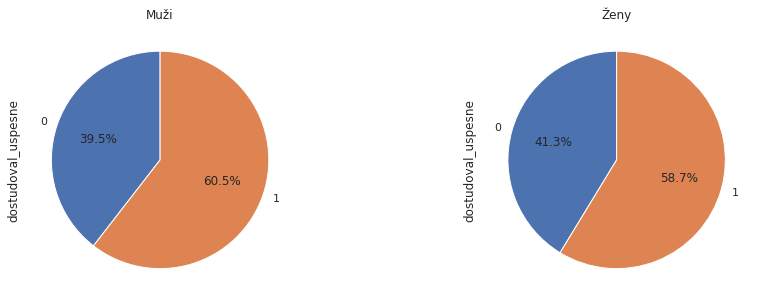

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(121)
matrix_mag[(matrix_mag.pohlavi_kod == 0)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Muži", startangle=90, autopct='%1.1f%%')
plt.subplot(122)
matrix_mag[(matrix_mag.pohlavi_kod == 1)].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="Ženy", startangle=90, autopct='%1.1f%%')

[0.  1.8 3.6 5.4]
['MI-PAA' 'MI-MPI' 'MI-PDP.16' 'MI-SPI.16']


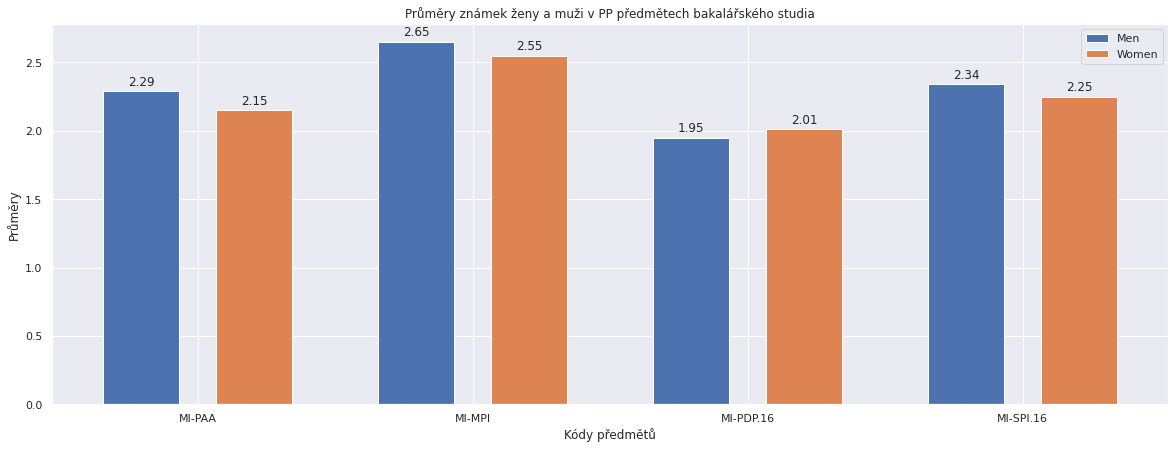

In [21]:
width = 0.35 

women_mag_id = matrix_mag[matrix_mag.pohlavi_kod == 1].studium_id.unique()
women_mag = courses_matrix_mag[courses_matrix_mag.index.isin(women_mag_id)]

men_mag_id = matrix_mag[matrix_mag.pohlavi_kod == 0].studium_id.unique()
men_mag = courses_matrix_mag[courses_matrix_mag.index.isin(men_mag_id)]

labels = np.array(courses_matrix_mag.columns)
men_means = np.array(round(men_mag.mean(), 2).values)
women_means = np.array(round(women_mag.mean(), 2).values)

x = np.arange(len(labels))*1.8  # the label locations
width = 0.5  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2 - 0.12, men_means, width, label='Men')
rects2 = ax.bar(x + width/2 + 0.12, women_means, width, label='Women')

ax.set_ylabel('Průměry')
ax.set_xlabel('Kódy předmětů')
ax.set_title('Průměry známek ženy a muži v PP předmětech bakalářského studia')
print(x)
print(labels)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.set_size_inches(20,7)
plt.show()

### BI-DPR přehled

<AxesSubplot:title={'center':'BI-DPR absolvováno'}, ylabel='dostudoval_uspesne'>

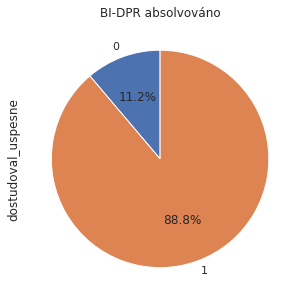

In [22]:
plt.figure(figsize=(15,5))

matrix_bak[(matrix_bak['BI-DPR'].notna())].dostudoval_uspesne.value_counts().sort_index().plot.pie(title="BI-DPR absolvováno", startangle=90, autopct='%1.1f%%')

/home/kapitann/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Známky v BI-DPR u všech studentů'}, ylabel='BI-DPR'>

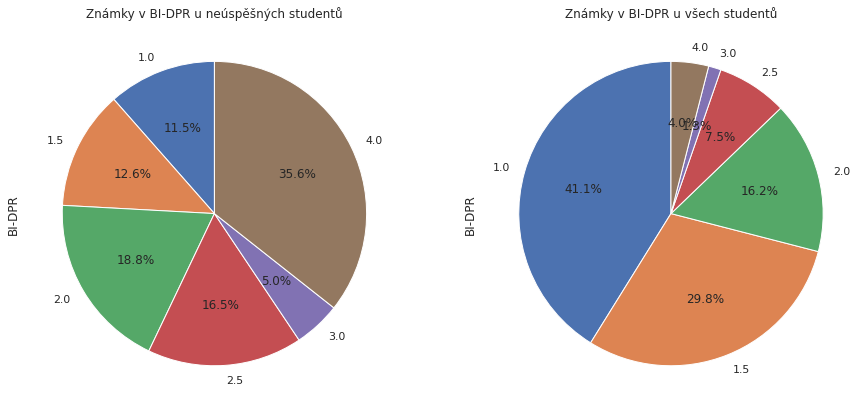

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(121)
matrix_bak[(matrix_bak['BI-DPR'].notna())
          & (matrix_bak['studium_id'].isin(failed_students_bak))]['BI-DPR'].value_counts().sort_index().plot.pie(title="Známky v BI-DPR u neúspěšných studentů", startangle=90, autopct='%1.1f%%')

plt.subplot(122)
matrix_bak[(matrix_bak['BI-DPR'].notna())]['BI-DPR'].value_counts().sort_index().plot.pie(title="Známky v BI-DPR u všech studentů", startangle=90, autopct='%1.1f%%')

In [24]:
len(matrix_bak[(matrix_bak['BI-DPR'].notna())
          & (matrix_bak['studium_id'].isin(failed_students_bak))])

261

In [25]:
len(matrix_bak[(matrix_bak['BI-DPR'].notna())
          & (matrix_bak['studium_id'].isin(successful_students_bak))])

2072

## Ukázka průměrné známky a poměru úspěšných zápočtů/zakončení předmětů ku neúspěšným ve vybraných předmětech v průběhu let

### PA1

#### Průměrná známka v předmětu napříč semestry

<ipython-input-26-ddd11263105f>:13: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


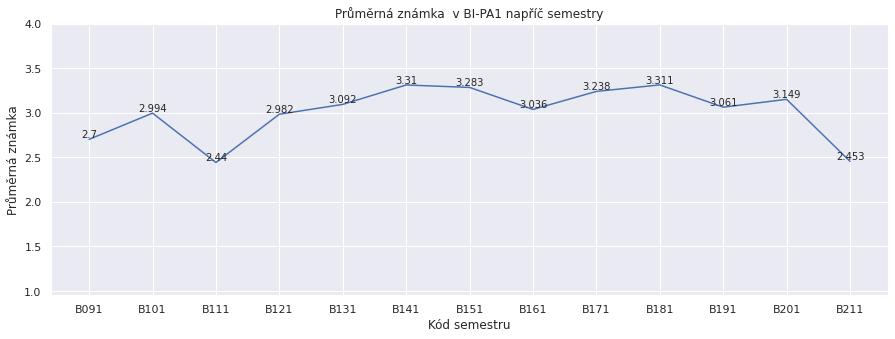

In [26]:
klasifikace_pa1 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-PA1'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B202')]
plt.figure(figsize=(15,5))

x = np.array(klasifikace_pa1.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_pa1.groupby('semestr_id')['znamka'].mean().values)

plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka  v BI-PA1 napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')

plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným
* Je vidět velký rozdíl mezi úspěšnými zápočty a úspěšným absolvování předmětu v zimním semestru 2020, jednalo se o první semestr v online formě pro BI-PA1.

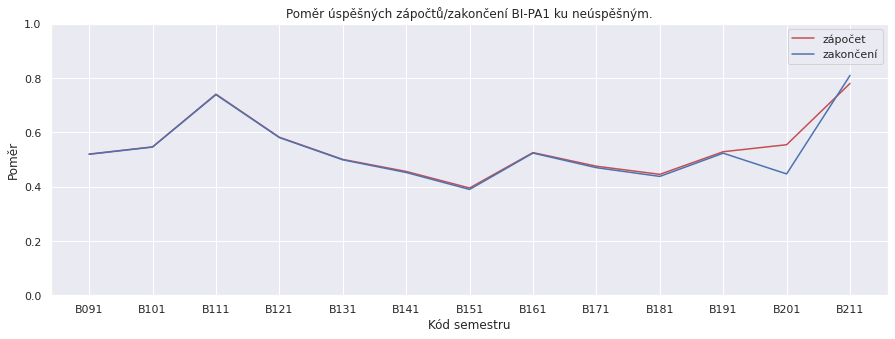

In [27]:
plt.figure(figsize=(15,5))

xa = klasifikace_pa1.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_pa1.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_pa1.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_pa1.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-PA1 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### ZMA

<ipython-input-28-e6122d555e14>:10: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


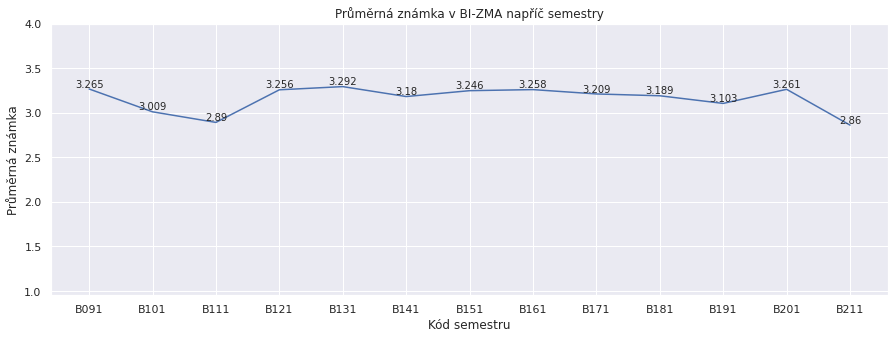

In [28]:
klasifikace_zma = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-ZMA'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_zma.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_zma.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-ZMA napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

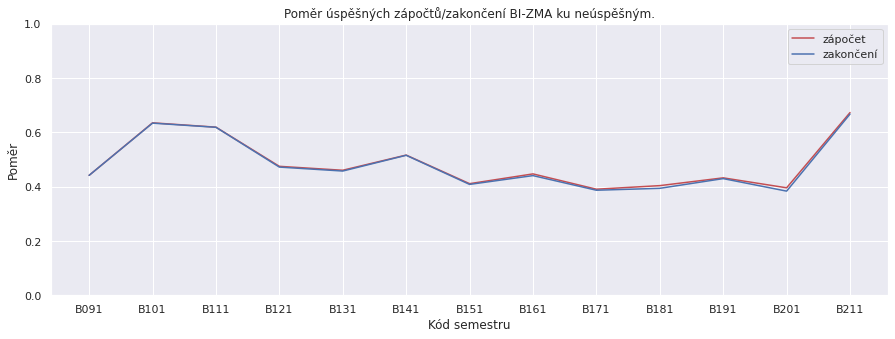

In [29]:
plt.figure(figsize=(15,5))

xa = klasifikace_zma.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_zma.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_zma.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_zma.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-ZMA ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### AAG
Bohužel u předmětu BI-AAG nemám záznamy z roku 2009.

<ipython-input-30-394f6ce0cca1>:10: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


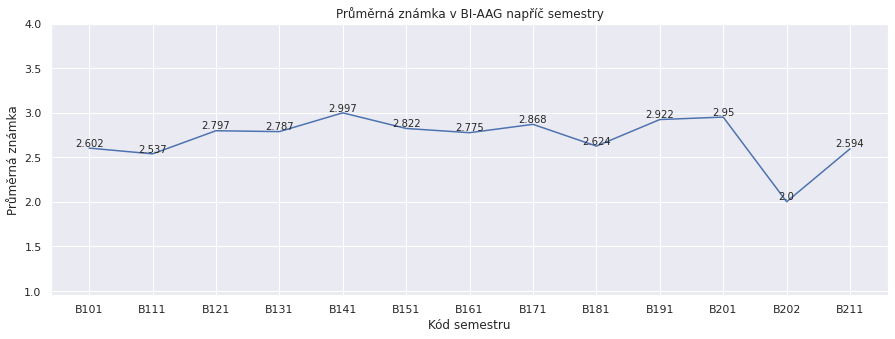

In [30]:
klasifikace_aag = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-AAG'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_aag.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_aag.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-AAG napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

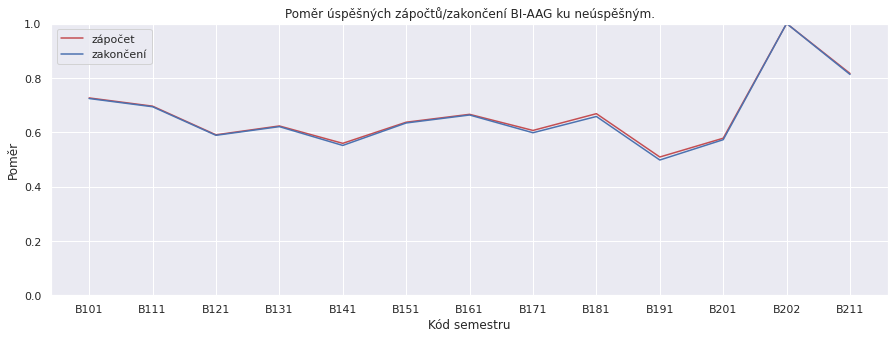

In [31]:
plt.figure(figsize=(15,5))

xa = klasifikace_aag.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_aag.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_aag.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_aag.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-AAG ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### AG1
* Předmět je vyučoován od roku 2016. Je na něm vidět rostoucí tendence průměru v průběhu let. 

<ipython-input-32-f4946b0441a2>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


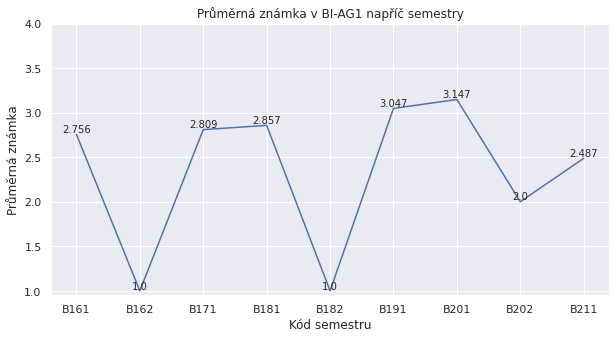

In [32]:
klasifikace_ag1 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-AG1'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(10,5))
x = np.array(klasifikace_ag1.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_ag1.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-AG1 napříč semestry')
plt.grid(True)

plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

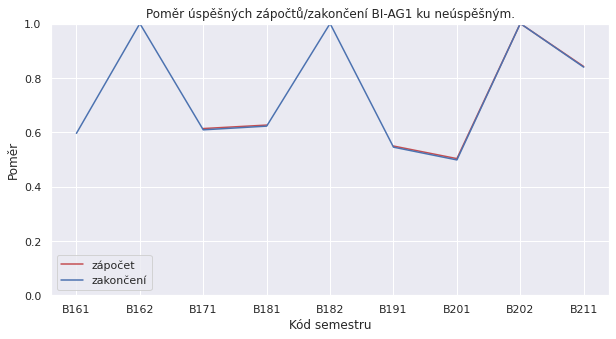

In [33]:
plt.figure(figsize=(10,5))

xa = np.array(klasifikace_ag1.groupby('semestr_id')['zapocteno'].mean().index)
ya = np.array(klasifikace_ag1.groupby('semestr_id')['zapocteno'].mean().values)

xb = np.array(klasifikace_ag1.groupby('semestr_id')['zakonceno'].mean().index)
yb = np.array(klasifikace_ag1.groupby('semestr_id')['zakonceno'].mean().values)

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-AG1 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### CAO

<ipython-input-34-c8ea9f575ae0>:10: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


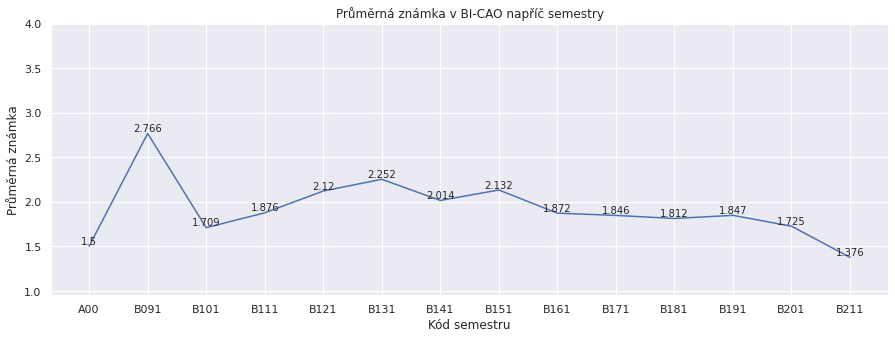

In [34]:
klasifikace_cao = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-CAO'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_cao.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_cao.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-CAO napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

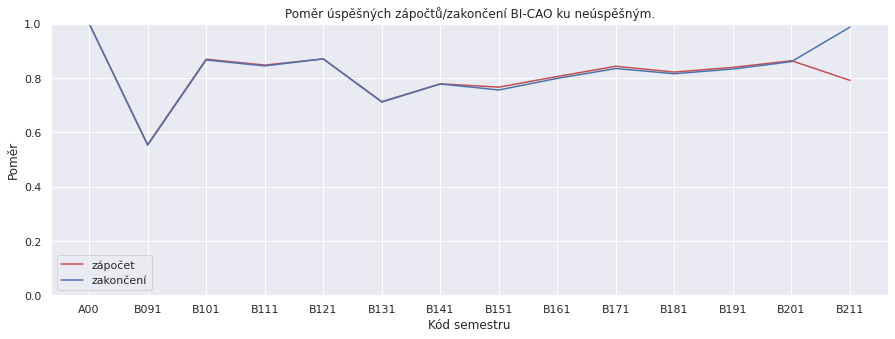

In [35]:
plt.figure(figsize=(15,5))

xa = klasifikace_cao.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_cao.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_cao.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_cao.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-CAO ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### LIN

<ipython-input-36-c6be150597e6>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


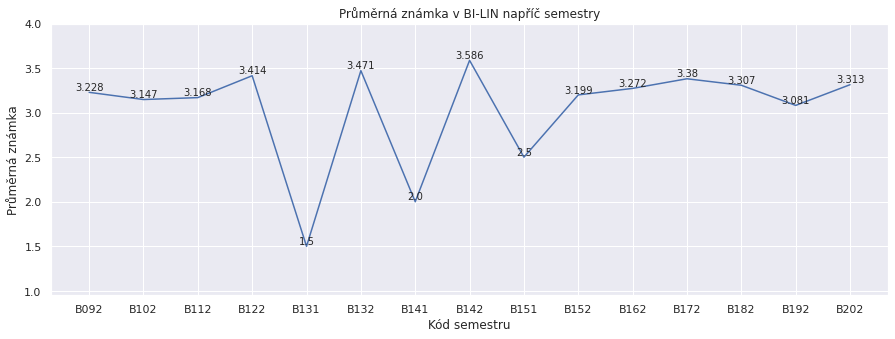

In [36]:
klasifikace_lin = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-LIN'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B212')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_lin.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_lin.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-LIN napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

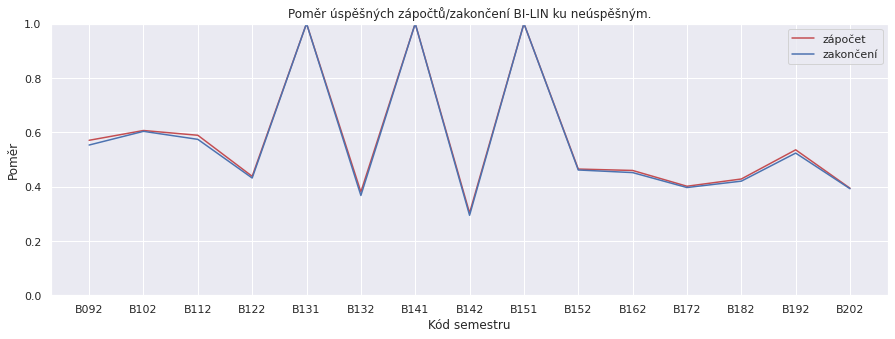

In [37]:
plt.figure(figsize=(15,5))

xa = klasifikace_lin.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_lin.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_lin.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_lin.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-LIN ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### MLO

<ipython-input-38-4b678473f93e>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


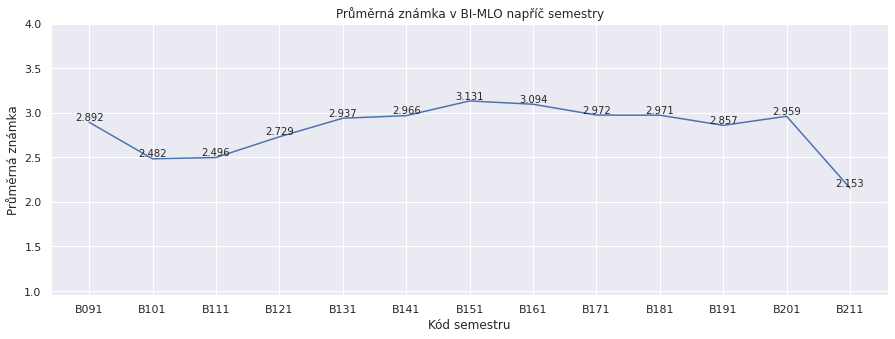

In [38]:
klasifikace_mlo = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-MLO'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A00')]
plt.figure(figsize=(15,5))
x = np.array(klasifikace_mlo.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_mlo.groupby('semestr_id')['znamka'].mean().values)
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
plt.title('Průměrná známka v BI-MLO napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

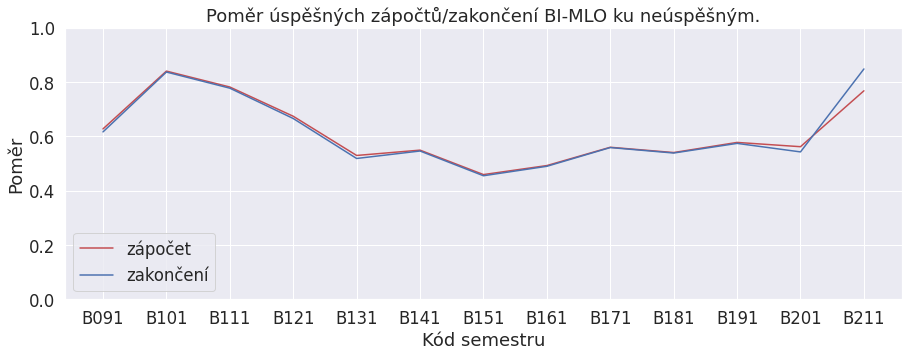

In [121]:
plt.figure(figsize=(15,5))

xa = klasifikace_mlo.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_mlo.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_mlo.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_mlo.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-MLO ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

In [119]:
klasifikace_mlo[(klasifikace_mlo.zapocteno == 0)
               & (klasifikace_mlo.zakonceno == 1)]

,semestr_id,predmet_id,studium_id,zapocteno,zakonceno,znamka,poradi_zapisu


In [120]:
klasifikace_mlo[(klasifikace_mlo.zapocteno.isna())
               & (klasifikace_mlo.zakonceno == 1)]

,semestr_id,predmet_id,studium_id,zapocteno,zakonceno,znamka,poradi_zapisu


In [127]:
klasifikace_mlo.groupby('semestr_id')['zapocteno'].mean()

semestr_id
B091    0.626932
B101    0.839607
B111    0.781065
B121    0.673469
B131    0.529231
B141    0.548798
B151    0.458886
B161    0.492042
B171    0.559387
B181    0.539974
B191    0.577191
B201    0.561453
B211    0.767123
Name: zapocteno, dtype: float64

In [128]:
klasifikace_mlo.groupby('semestr_id')['zakonceno'].mean()

semestr_id
B091    0.615909
B101    0.836120
B111    0.776772
B121    0.665172
B131    0.518110
B141    0.545584
B151    0.454545
B161    0.489333
B171    0.558259
B181    0.538158
B191    0.573633
B201    0.542274
B211    0.847458
Name: zakonceno, dtype: float64

In [129]:
len(klasifikace_mlo[(klasifikace_mlo.zakonceno.isna())
                   & (klasifikace_mlo.semestr_id == 'B211')])

14

In [130]:
len(klasifikace_mlo[(klasifikace_mlo.zapocteno.isna())
                   & (klasifikace_mlo.semestr_id == 'B211')])

0

### PS1
* Do roku 2015 se vyučoval i v letním semestru. Výjimkou je rok 2010, kde se vyučoval pouze v zimním semestru. Od roku 2016 už pouze v zimním. Až na letní semestr 2011, ve kterém byl celkově nejhorší průměr, je vidět, že průměr v letních semestrech je lepší v porovnání se zimním semestrem ve stejném roce. Od roku 2016 je vidět klesající tendence průměru. V semestru B171 došlo k přechodu průběžných týdenních testů z papírové formy do systému Learnshell. Od semestru B191 se semestrální testy píši v systému Learnshell namísto dosavadního systému Progtest. Je zde vidět pokles průměru. Nejnižší průměr je v semestru B201, v tomto semestru zároveň došlo k prvnímu běhu předmětu v online formě. 

<ipython-input-40-914bd4081cb2>:10: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


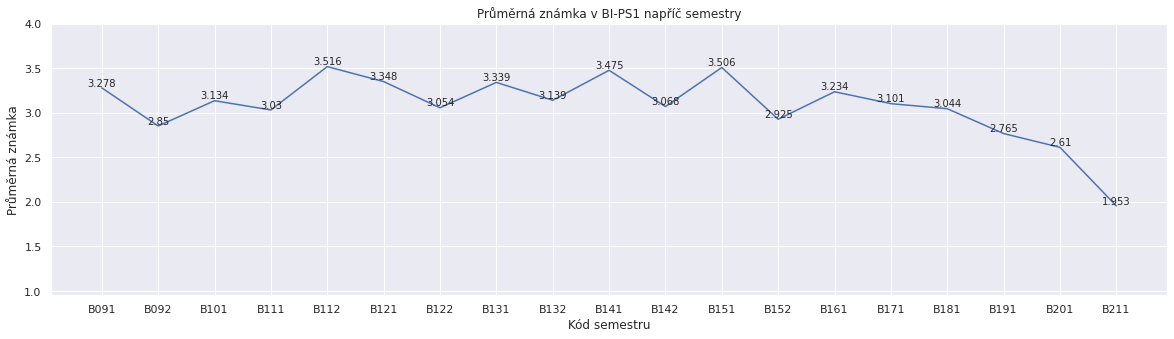

In [40]:
klasifikace_ps1 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-PS1'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(20,5))
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
x = np.array(klasifikace_ps1.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_ps1.groupby('semestr_id')['znamka'].mean().values)
plt.title('Průměrná známka v BI-PS1 napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným
* BI-PS1 je zakončen klasifikovaným zápočtem, pro jsou oba poměry totožné. 

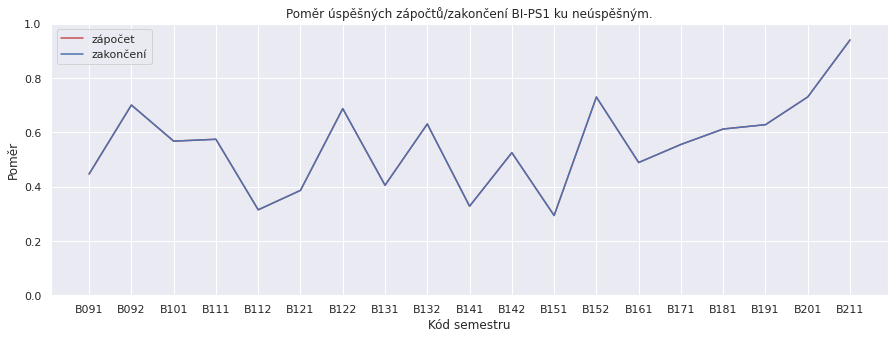

In [41]:
plt.figure(figsize=(15,5))

xa = klasifikace_ps1.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_ps1.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_ps1.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_ps1.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-PS1 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### PA2
* U BI-PA2 je dobře rozpoznatelný letní semestr 2019, ve kterém začala covidová opatření a poprvé se přešlo na online výuku. Průměrná známka se zlepšila ze známky E (3.0 <= E < 4.0) na známku C (2.0 <= C < 2.5). To může být způsobeno tím, že odpadla zkouška, která byla plně nahrazena pouze obhájením semestrální práce, průběžné testy si mohli studenti plnit sami doma a získat tak více bodů, či tím, že PA2 byl jeden z mála předmětů , kde byla již od začátku kvalitní online výuka (kvalitní záznamy přednášek a proseminářu). 

<ipython-input-42-0dbb15c7cfde>:11: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(ymin=1)


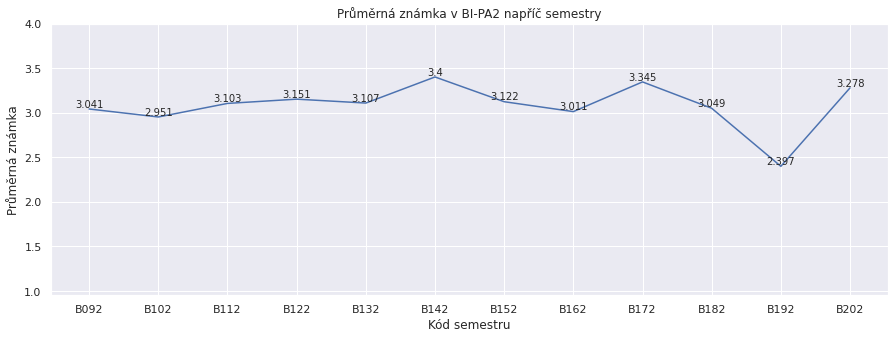

In [42]:
klasifikace_pa2 = klasifikace_fact_bak_09[(klasifikace_fact_bak_09['predmet_id'] == courses_tran_kod_id['BI-PA2'])
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'B212')
                                         & (klasifikace_fact_bak_09['semestr_id'] != 'A000')]
plt.figure(figsize=(15,5))
plt.xlabel('Kód semestru')
plt.ylabel('Průměrná známka')
x = np.array(klasifikace_pa2.groupby('semestr_id')['znamka'].mean().index)
y = np.array(klasifikace_pa2.groupby('semestr_id')['znamka'].mean().values)
plt.title('Průměrná známka v BI-PA2 napříč semestry')
plt.grid(True)
plt.ylim(ymin=1)
plt.ylim(ymax=4)
for index, value in enumerate(y):
    plt.text(index, value, str(round(value, 3)), horizontalalignment='center', verticalalignment='bottom', fontsize='small')
plt.plot(x, y)

#### Poměr úspěšných zápočtů/zakončení předmětů ku neúspěšným

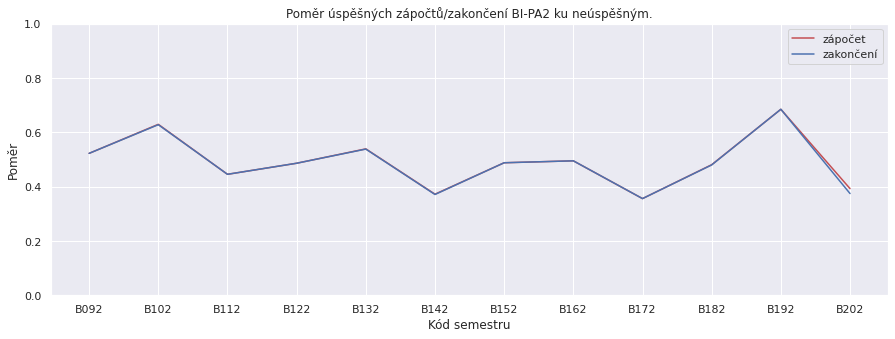

In [43]:
plt.figure(figsize=(15,5))

xa = klasifikace_pa2.groupby('semestr_id')['zapocteno'].mean().index
ya = klasifikace_pa2.groupby('semestr_id')['zapocteno'].mean().values

xb = klasifikace_pa2.groupby('semestr_id')['zakonceno'].mean().index
yb = klasifikace_pa2.groupby('semestr_id')['zakonceno'].mean().values

plt.grid(True)

plt.plot(xa, ya, color='r', label='zápočet')
plt.plot(xb, yb, color='b', label='zakončení')

plt.title('Poměr úspěšných zápočtů/zakončení BI-PA2 ku neúspěšným.')

plt.xlabel('Kód semestru')
plt.ylabel('Poměr')

plt.legend()

plt.ylim(ymin=0)
plt.ylim(ymax=1)

plt.show()

### Průměry v povinných předmětech

#### Bakalář

Text(0.5, 1.0, 'Průměry známek všech studentů v PP předmětech bakalářského studia')

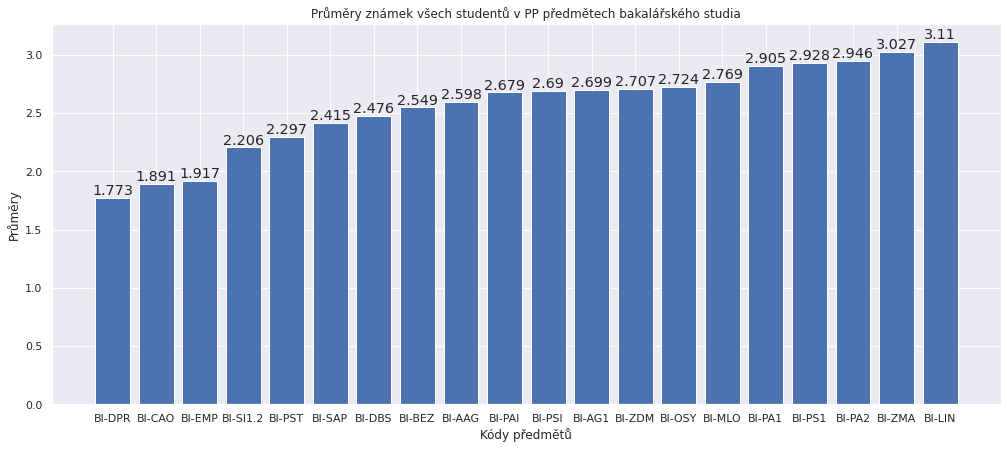

In [44]:
plt.figure(figsize=(17,7))

x = np.array(round(courses_matrix_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(courses_matrix_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek všech studentů v PP předmětech bakalářského studia')

##### Průměry úspěšných studentů

Text(0.5, 1.0, 'Průměry známek úspěšných studentů v PP předmětech bakalářského studia')

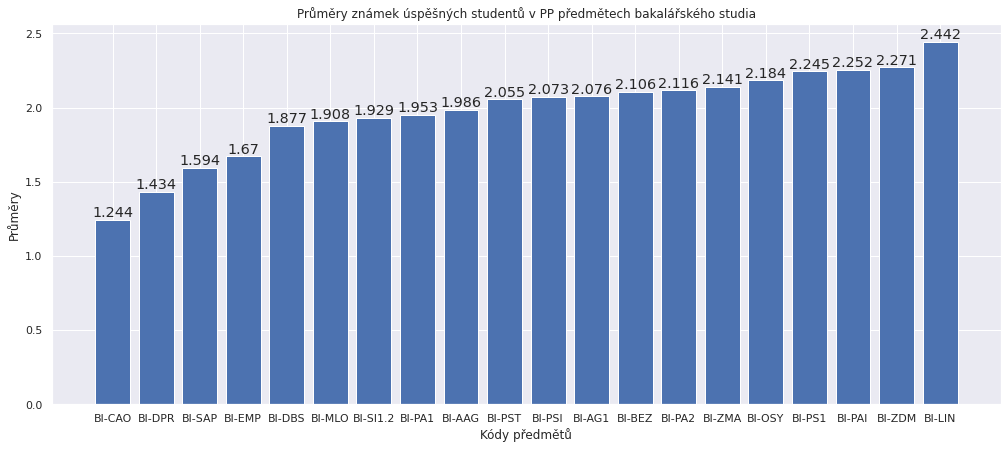

In [45]:
success_bak = courses_matrix_bak[courses_matrix_bak.index.isin(successful_students_bak)]

plt.figure(figsize=(17,7))

x = np.array(round(success_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(success_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek úspěšných studentů v PP předmětech bakalářského studia')

##### Průměry neúspěšných studentů

Text(0.5, 1.0, 'Průměry známek neúspěšných studentů v PP předmětech bakalářského studia')

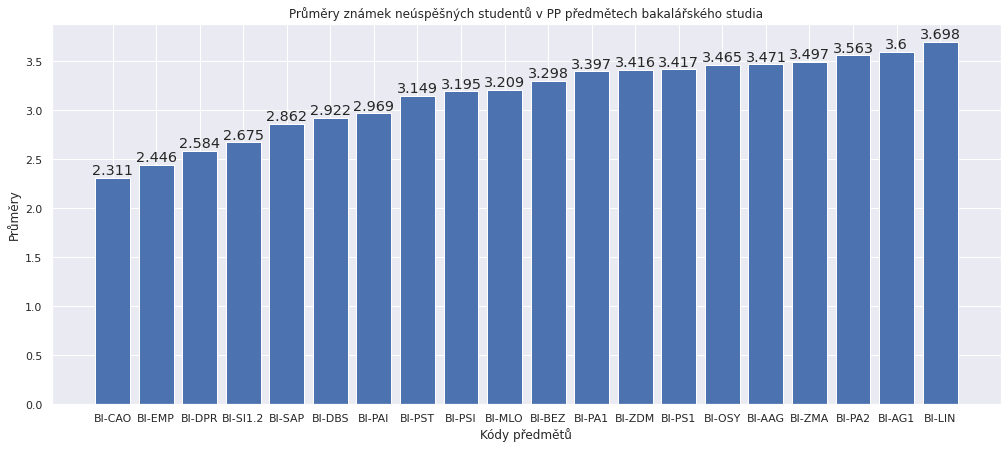

In [46]:
fail_bak = courses_matrix_bak[courses_matrix_bak.index.isin(failed_students_bak)]

plt.figure(figsize=(17,7))

x = np.array(round(fail_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek neúspěšných studentů v PP předmětech bakalářského studia')

#### Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia

Text(0.5, 1.0, 'Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia')

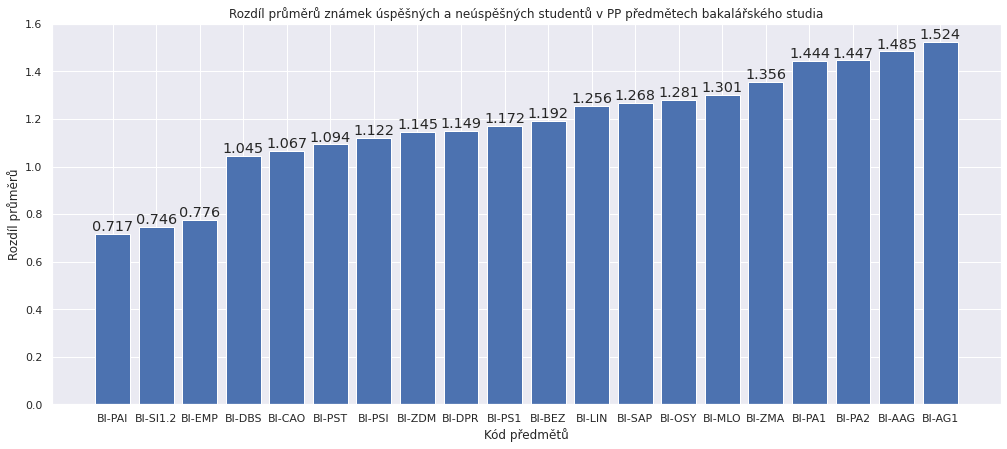

In [47]:
plt.figure(figsize=(17,7))

x = np.array(round(fail_bak.mean() - success_bak.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_bak.mean() - success_bak.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kód předmětů')
plt.ylabel('Rozdíl průměrů')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia')

#### Magistr

Text(0.5, 1.0, 'Průměry známek všech studentů v PP předmětech magisterského studia')

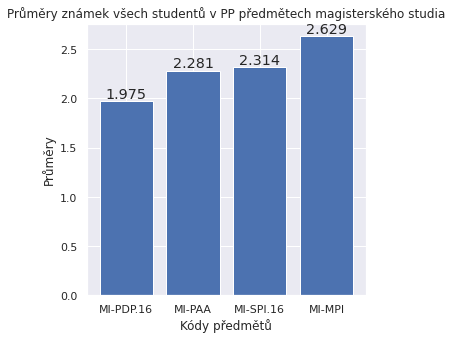

In [48]:
#courses_matrix_mag = courses_matrix_mag.set_index('studium_id')

plt.figure(figsize=(5,5))

x = np.array(round(courses_matrix_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(courses_matrix_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek všech studentů v PP předmětech magisterského studia')

#### Průměry úspěšných studentů

Text(0.5, 1.0, 'Průměry známek úspěšných studentů v PP předmětech magisterského studia')

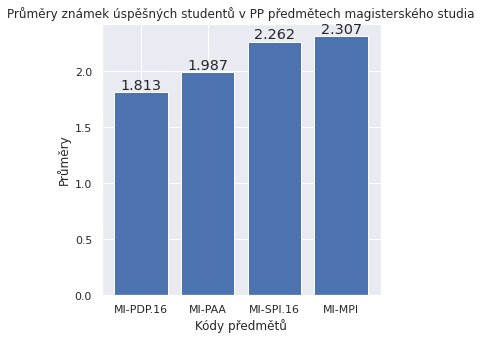

In [49]:
success_mag = courses_matrix_mag[courses_matrix_mag.index.isin(successful_students_mag)]

plt.figure(figsize=(5,5))

x = np.array(round(success_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(success_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek úspěšných studentů v PP předmětech magisterského studia')

#### Průměry neúspěšných studentů

Text(0.5, 1.0, 'Průměry známek neúspěšných studentů v PP předmětech magisterského studia')

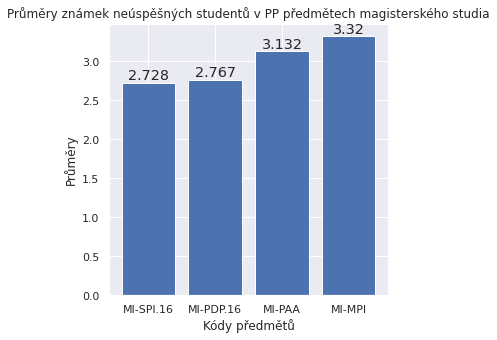

In [50]:
fail_mag = courses_matrix_mag[courses_matrix_mag.index.isin(failed_students_mag)]

plt.figure(figsize=(5, 5))

x = np.array(round(fail_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kódy předmětů')
plt.ylabel('Průměry')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Průměry známek neúspěšných studentů v PP předmětech magisterského studia')

#### Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech bakalářského studia

Text(0.5, 1.0, 'Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech magisterského studia')

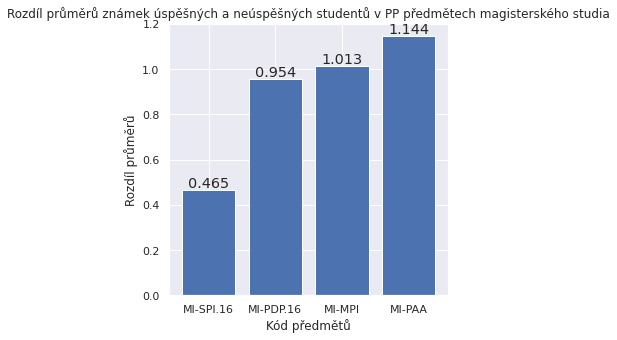

In [51]:
plt.figure(figsize=(5, 5))

x = np.array(round(fail_mag.mean() - success_mag.mean(), 3).sort_values(ascending=True).index)
y = np.array(round(fail_mag.mean() - success_mag.mean(), 3).sort_values(ascending=True).values)

plt.grid(True)

plt.xlabel('Kód předmětů')
plt.ylabel('Rozdíl průměrů')

plt.bar(x, y, color='b')

for index, value in enumerate(y):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize='large')

plt.title('Rozdíl průměrů známek úspěšných a neúspěšných studentů v PP předmětech magisterského studia')

# Covidový rok a porovnání s jinými lety

## Matice překryvu úspěšnosti předmětů

In [52]:
courses = courses_matrix_bak.columns.unique()
courses_ids = []
for course in courses:
    courses_ids.append(courses_tran_kod_id[course])

courses_first_year = ['BI-PA1', 'BI-PAI', 'BI-CAO', 'BI-PS1', 'BI-MLO', 'BI-ZMA', 'BI-PA2',
       'BI-DBS', 'BI-SAP', 'BI-LIN']
courses_first_year_ids = []
for course in courses_first_year:
    courses_first_year_ids.append(courses_tran_kod_id[course])

### Covidový rok

In [53]:
covid_students_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2020)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()

In [54]:
covid_PP = klasifikace_fact_changed[((klasifikace_fact_changed.semestr_id == 'B201')
                                       | (klasifikace_fact_changed.semestr_id == 'B202'))
                                & (klasifikace_fact_changed.predmet_id.isin(courses_ids))
                                & (klasifikace_fact_changed.studium_id.isin(covid_students_ids))]

In [55]:
covid_PP_corr = pd.DataFrame(columns = ['course_1', 'course_2', 'correlation'])
for course_1 in courses_first_year_ids:    
    for course_2 in courses_first_year_ids:
        course_1_passed = covid_PP[(covid_PP.predmet_id == course_1)
                        & (covid_PP.znamka != 4)
                        & (covid_PP.znamka.notna())]
        course_2_passed = covid_PP[(covid_PP.predmet_id == course_2)
                        & (covid_PP.znamka != 4)
                        & (covid_PP.znamka.notna())]
        course_1_2_passed = course_1_passed[course_1_passed.studium_id.isin(course_2_passed.studium_id.unique())]
        covid_PP_corr = covid_PP_corr.append({'course_1' : courses_tran_id_kod[course_1], 'course_2' : courses_tran_id_kod[course_2], 'correlation' : (len(course_1_2_passed.studium_id.unique()) / len(course_2_passed.studium_id.unique()))},  
                ignore_index = True)

In [56]:
corr_matrix = covid_PP_corr.astype({'correlation' : float}).pivot('course_1', 'course_2', 'correlation')

### Studenti s nástupovým rokem 2018

In [57]:
pre_covid_2018_students_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2018)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()

In [58]:
pre_covid_2018_PP = klasifikace_fact_changed[((klasifikace_fact_changed.semestr_id == 'B181')
                                       | (klasifikace_fact_changed.semestr_id == 'B182'))
                                & (klasifikace_fact_changed.predmet_id.isin(courses_ids))
                                & (klasifikace_fact_changed.studium_id.isin(pre_covid_2018_students_ids))]

In [59]:
pre_covid_2018_PP_corr = pd.DataFrame(columns = ['course_1', 'course_2', 'correlation'])
students_2018_sum = len(pre_covid_2018_students_ids)
for course_1 in courses_first_year_ids:    
    for course_2 in courses_first_year_ids:
        course_1_passed = pre_covid_2018_PP[(pre_covid_2018_PP.predmet_id == course_1)
                        & (pre_covid_2018_PP.znamka != 4)
                        & (pre_covid_2018_PP.znamka.notna())]
        course_2_passed = pre_covid_2018_PP[(pre_covid_2018_PP.predmet_id == course_2)
                        & (pre_covid_2018_PP.znamka != 4)
                        & (pre_covid_2018_PP.znamka.notna())]
        course_1_2_passed = course_1_passed[course_1_passed.studium_id.isin(course_2_passed.studium_id.unique())]
        pre_covid_2018_PP_corr = pre_covid_2018_PP_corr.append({'course_1' : courses_tran_id_kod[course_1], 'course_2' : courses_tran_id_kod[course_2], 'correlation' : (len(course_1_2_passed.studium_id.unique()) / len(course_2_passed.studium_id.unique()))},  
                ignore_index = True)

In [60]:
pre_covid_2018_corr_matrix = pre_covid_2018_PP_corr.astype({'correlation' : float}).pivot('course_1', 'course_2', 'correlation')

### Matice překryvu úspěšnosti předmětů pro oba roky

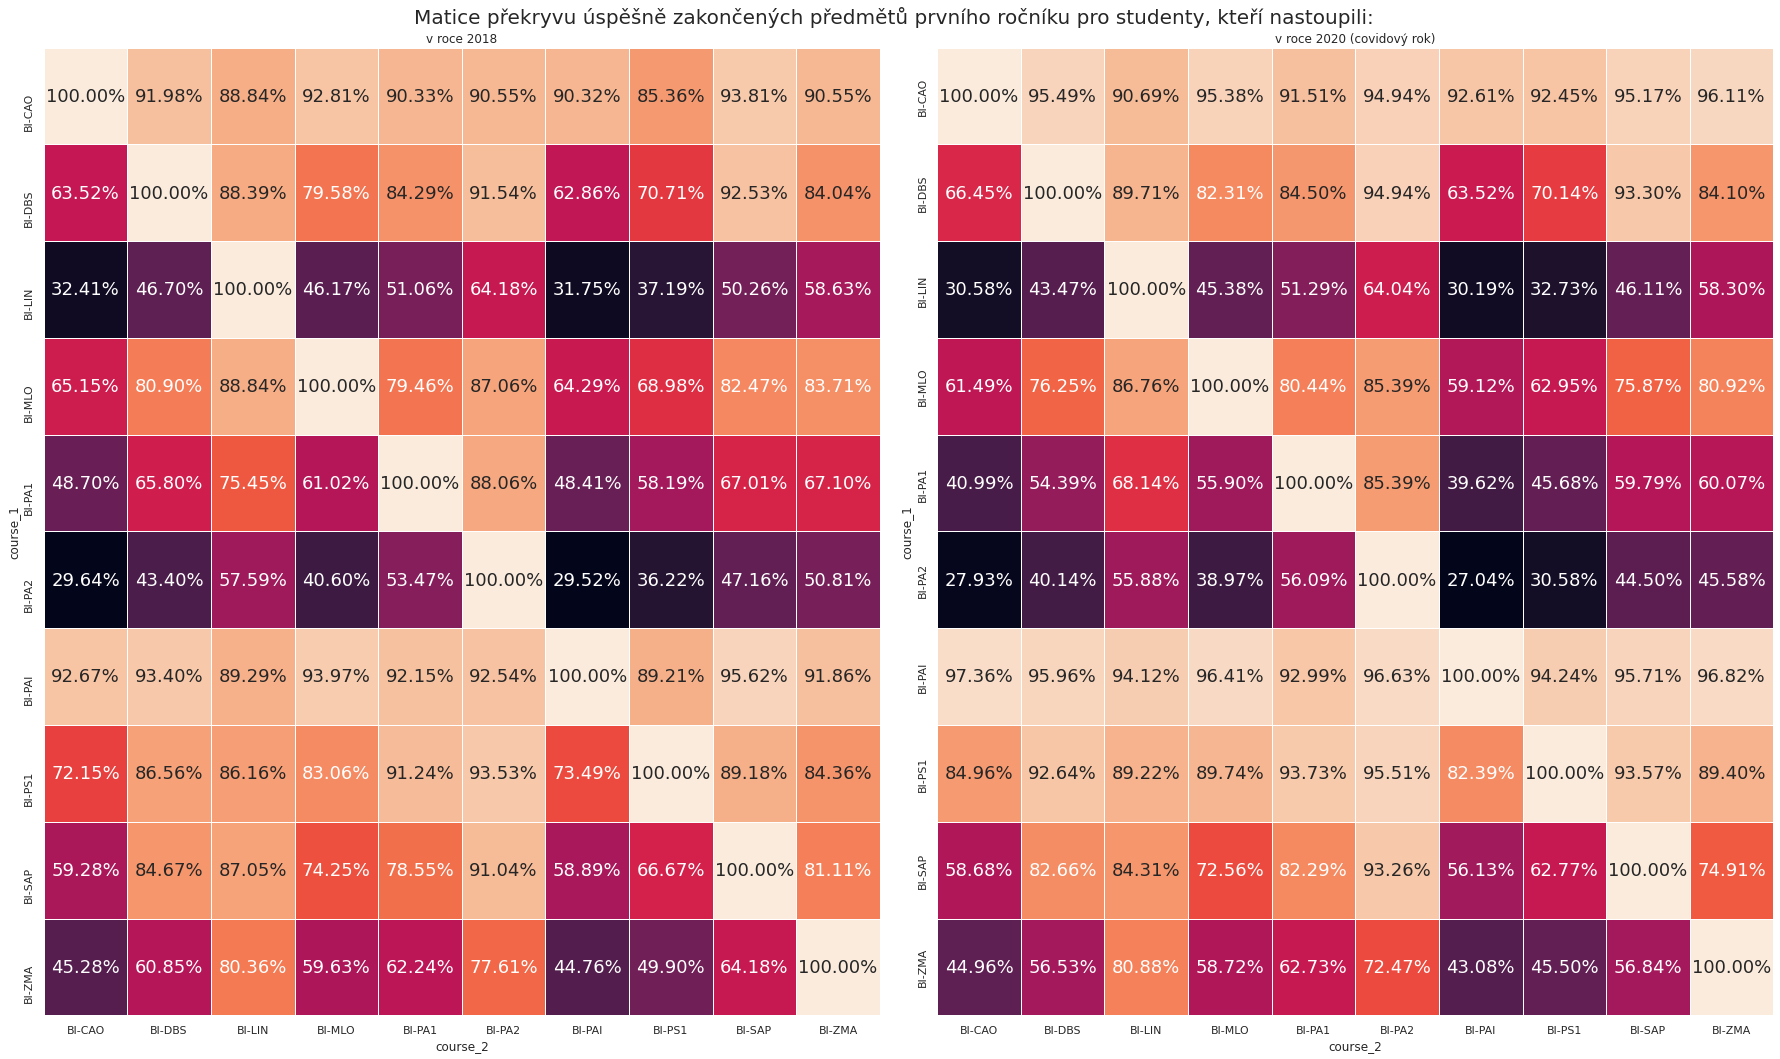

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(25,15))

plt.yticks(va="center")
sns.heatmap(pre_covid_2018_corr_matrix, ax=ax1, cbar=False, annot=True, annot_kws={"size": 18}, fmt='.2%', linewidths=.5)
ax1.set_title('v roce 2018')

plt.yticks(va="center")
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 18}, ax=ax2, cbar=False, fmt='.2%', linewidths=.5)
ax2.set_title('v roce 2020 (covidový rok)')

plt.suptitle('Matice překryvu úspěšně zakončených předmětů prvního ročníku pro studenty, kteří nastoupili:',fontsize=20)
fig.tight_layout()
sns.set(font_scale=1.5)

# Průchodnost

In [62]:
def get_pruchodnost(klasifikace_year, courses_top20):
    pruchodnost_prvaci_covid = pd.DataFrame(columns=['predmet', 'zapsano', 'zapocteno', 'zakonceno'])
    for course in courses_top20:
        pruchodnost_prvaci_covid = pruchodnost_prvaci_covid.append({'predmet': courses_tran_id_kod[int(course)],
                                    'zapsano': len(klasifikace_year[klasifikace_year.predmet_id == course]),
                                    'zapocteno': len(klasifikace_year[(klasifikace_year.predmet_id == course)
                                                                           & (klasifikace_year.zapocteno == 1)]),
                                    'zakonceno': len(klasifikace_year[(klasifikace_year.predmet_id == course)
                                                                           & (klasifikace_year.zakonceno == 1)])}, ignore_index=True)
    return pruchodnost_prvaci_covid

## Bakalář

### Prváci

#### 2020 nástup

In [63]:
students_2020_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2020)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()
klasifikace_2020_year = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                 | (klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2020_year = klasifikace_2020_year[klasifikace_2020_year.studium_id.isin(students_2020_ids)]

In [64]:
courses_top20_2020_bc_ids = klasifikace_2020_year.predmet_id.value_counts().nlargest(20).index.unique()

In [65]:
pruchodnost_prvaci_2020 = get_pruchodnost(klasifikace_2020_year, courses_top20_2020_bc_ids)

In [66]:
pruchodnost_prvaci_2020

,predmet,zapsano,zapocteno,zakonceno
0,TV,955,951,951
1,BI-PA1,834,423,271
2,BI-PS1,799,556,556
3,BI-ZMA,795,296,283
4,BI-ULI,793,549,549
5,BI-MLO,783,423,390
6,BI-PAI,778,0,636
7,BI-CAO,758,620,605
8,BI-LIN,595,210,204
9,BI-DBS,593,423,421


#### nástup 2019

In [67]:
students_2019_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2019)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()
klasifikace_2019_year = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B191')
                                                 | (klasifikace_fact_changed.semestr_id == 'B192')]
klasifikace_2019_year = klasifikace_2019_year[klasifikace_2019_year.studium_id.isin(students_2019_ids)]

In [68]:
courses_top20_2019_bc_ids = klasifikace_2019_year.predmet_id.value_counts().nlargest(20).index.unique()

In [69]:
pruchodnost_prvaci_2019 = get_pruchodnost(klasifikace_2019_year, courses_top20_2019_bc_ids)

In [70]:
pruchodnost_prvaci_2019

,predmet,zapsano,zapocteno,zakonceno
0,TV,1167,823,823
1,BI-PA1,843,378,368
2,BI-ZMA,835,319,315
3,BI-PS1,819,477,477
4,BI-ULI,810,503,503
5,BI-MLO,800,433,425
6,BI-PAI,796,0,617
7,BI-CAO,748,589,566
8,BI-DBS,554,420,420
9,BI-LIN,537,252,236


#### 2018

In [71]:
students_2018_ids = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2018)
                                                 & (studium_dim.typ_programu == 'B')].studium_id.unique()
klasifikace_2018_year = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B181')
                                                 | (klasifikace_fact_changed.semestr_id == 'B182')]
klasifikace_2018_year = klasifikace_2018_year[klasifikace_2018_year.studium_id.isin(students_2018_ids)]

In [72]:
courses_top20_2018_bc_ids = klasifikace_2018_year.predmet_id.value_counts().nlargest(20).index.unique()

In [73]:
pruchodnost_prvaci_2018 = get_pruchodnost(klasifikace_2018_year, courses_top20_2018_bc_ids)

In [74]:
pruchodnost_prvaci_2018

,predmet,zapsano,zapocteno,zakonceno
0,TV,1107,787,787
1,BI-PS1,886,519,519
2,BI-PA1,883,343,331
3,BI-ZMA,883,326,307
4,BI-MLO,852,440,431
5,BI-PAI,851,0,630
6,BI-CAO,820,637,614
7,BI-ULI,775,505,505
8,BI-LIN,594,228,224
9,BI-DBS,575,427,424


### Druháci

#### 2020 nástup
* pouze zimní semestr

In [75]:
klasifikace_2020_year_second = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B211')]
klasifikace_2020_year_second = klasifikace_2020_year_second[klasifikace_2020_year_second.studium_id.isin(students_2020_ids)]

In [76]:
courses_top20_2020_bc_ids_second = klasifikace_2020_year_second.predmet_id.value_counts().nlargest(20).index.unique()

In [77]:
pruchodnost_druhaci_2020 = get_pruchodnost(klasifikace_2020_year_second, courses_top20_2020_bc_ids_second)

In [78]:
pruchodnost_druhaci_2020

,predmet,zapsano,zapocteno,zakonceno
0,BI-AAG,380,206,199
1,BI-ZDM,363,209,205
2,BI-AG1,332,161,158
3,TV,164,96,96
4,BI-PA1,142,87,85
5,BI-ZMA,129,65,63
6,BI-TJV,125,87,87
7,BI-PPA,102,60,60
8,BI-PJV,85,75,75
9,BI-EMP,73,70,70


#### 2019 nástup

In [79]:
klasifikace_2019_year_second = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                 | (klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2019_year_second = klasifikace_2019_year_second[klasifikace_2019_year_second.studium_id.isin(students_2019_ids)]

In [80]:
courses_top20_2019_bc_ids_second = klasifikace_2019_year_second.predmet_id.value_counts().nlargest(20).index.unique()

In [81]:
pruchodnost_druhaci_2019 = get_pruchodnost(klasifikace_2019_year_second, courses_top20_2019_bc_ids_second)

In [82]:
pruchodnost_druhaci_2019

,predmet,zapsano,zapocteno,zakonceno
0,BI-AAG,460,244,238
1,BI-ZDM,437,204,201
2,BI-AG1,420,182,178
3,TV,350,348,348
4,BI-PSI,317,228,225
5,BI-BEZ,308,235,230
6,BI-OSY,290,248,214
7,BI-SI1.2,217,194,183
8,BI-EMP,191,153,153
9,BI-ZMA,146,71,63


#### 2018 nástup

In [83]:
klasifikace_2018_year_second = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B191')
                                                 | (klasifikace_fact_changed.semestr_id == 'B192')]
klasifikace_2018_year_second = klasifikace_2018_year_second[klasifikace_2018_year_second.studium_id.isin(students_2018_ids)]

In [84]:
courses_top20_2018_bc_ids_second = klasifikace_2018_year_second.predmet_id.value_counts().nlargest(20).index.unique()

In [85]:
pruchodnost_druhaci_2018 = get_pruchodnost(klasifikace_2018_year_second, courses_top20_2018_bc_ids_second)

In [86]:
pruchodnost_druhaci_2018

,predmet,zapsano,zapocteno,zakonceno
0,BI-AAG,408,206,194
1,BI-ZDM,385,203,200
2,TV,363,274,274
3,BI-AG1,347,184,181
4,BI-PSI,286,231,230
5,BI-BEZ,271,212,210
6,BI-OSY,258,227,216
7,BI-SI1.2,207,190,186
8,BI-EMP,171,153,153
9,BI-PJV,166,149,147


### Třetáci

#### 2019 nástup
* pouze zimní semestr

In [87]:
klasifikace_2019_year_third = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B211')]
klasifikace_2019_year_third = klasifikace_2019_year_third[klasifikace_2019_year_third.studium_id.isin(students_2019_ids)]

In [88]:
courses_top20_2019_bc_ids_third = klasifikace_2019_year_third.predmet_id.value_counts().nlargest(20).index.unique()

In [89]:
pruchodnost_tretaci_2019 = get_pruchodnost(klasifikace_2019_year_third, courses_top20_2019_bc_ids_third)

In [90]:
pruchodnost_tretaci_2019

,predmet,zapsano,zapocteno,zakonceno
0,BI-PST,217,195,190
1,BI-BPR,128,113,113
2,TV,110,64,64
3,BI-EMP,87,87,87
4,BI-SI2.3,82,76,76
5,BI-SP2.1,78,77,77
6,BI-OOP,76,69,69
7,BI-VZD,74,61,61
8,BI-AG1,72,53,54
9,BI-KOM,71,69,69


#### 2018 nástup

In [91]:
klasifikace_2018_year_third = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                      | (klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2018_year_third = klasifikace_2018_year_third[klasifikace_2018_year_third.studium_id.isin(students_2018_ids)]

In [92]:
courses_top20_2018_bc_ids_third = klasifikace_2018_year_third.predmet_id.value_counts().nlargest(20).index.unique()

In [93]:
pruchodnost_tretaci_2018 = get_pruchodnost(klasifikace_2018_year_third, courses_top20_2018_bc_ids_third)

In [94]:
pruchodnost_tretaci_2018

,predmet,zapsano,zapocteno,zakonceno
0,BI-PST,252,228,224
1,TV,200,200,200
2,BI-BPR,179,149,149
3,BI-DPR,151,132,132
4,BI-BAP,141,123,123
5,BI-EMP,140,124,124
6,BI-AG1,100,68,67
7,BI-AAG,99,83,83
8,BI-SI1.2,95,83,83
9,BI-ZDM,91,67,66


## Magistr

### Prváci

#### 2020 nástup

In [95]:
students_2020_ids_mgr = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2020)
                                                 & (studium_dim.typ_programu == 'N')].studium_id.unique()
klasifikace_2020_year_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                 | (klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2020_year_mgr = klasifikace_2020_year_mgr[klasifikace_2020_year_mgr.studium_id.isin(students_2020_ids_mgr)]

In [96]:
courses_top20_2020_mgr_ids = klasifikace_2020_year_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [97]:
pruchodnost_prvaci_2020_mgr = get_pruchodnost(klasifikace_2020_year_mgr, courses_top20_2020_mgr_ids)

In [98]:
pruchodnost_prvaci_2020_mgr

,predmet,zapsano,zapocteno,zakonceno
0,NI-MPI,186,133,127
1,NI-KOP,147,101,97
2,NI-PDP,139,125,126
3,NI-VSM,137,118,115
4,NI-AM1,83,69,67
5,TV,66,66,66
6,NI-ADP,64,51,48
7,NI-UMI,62,41,41
8,NI-MVI,50,39,38
9,NI-ADM,49,44,44


#### 2019 nástup

In [99]:
students_2019_ids_mgr = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2019)
                                                 & (studium_dim.typ_programu == 'N')].studium_id.unique()
klasifikace_2019_year_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B191')
                                                 | (klasifikace_fact_changed.semestr_id == 'B192')]
klasifikace_2019_year_mgr = klasifikace_2019_year_mgr[klasifikace_2019_year_mgr.studium_id.isin(students_2019_ids_mgr)]

In [100]:
courses_top20_2019_mgr_ids = klasifikace_2019_year_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [101]:
pruchodnost_prvaci_2019_mgr = get_pruchodnost(klasifikace_2019_year_mgr, courses_top20_2019_mgr_ids)

In [102]:
pruchodnost_prvaci_2019_mgr

,predmet,zapsano,zapocteno,zakonceno
0,MI-MPI,160,89,88
1,MI-PAA,148,101,98
2,MI-PDP.16,123,121,120
3,MI-SPI.16,109,103,102
4,TV,103,61,61
5,MI-MDW.16,83,56,54
6,MI-ADP.16,52,41,40
7,MI-UMI,49,32,32
8,MI-PIS.16,49,49,46
9,MI-NSS.16,47,0,44


#### 2018 nástup

In [103]:
students_2018_ids_mgr = studium_dim_changed[(studium_dim_changed.datum_zahajeni == 2018)
                                                 & (studium_dim.typ_programu == 'N')].studium_id.unique()
klasifikace_2018_year_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B181')
                                                 | (klasifikace_fact_changed.semestr_id == 'B182')]
klasifikace_2018_year_mgr = klasifikace_2018_year_mgr[klasifikace_2018_year_mgr.studium_id.isin(students_2018_ids_mgr)]

In [104]:
courses_top20_2018_mgr_ids = klasifikace_2018_year_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [105]:
pruchodnost_prvaci_2018_mgr = get_pruchodnost(klasifikace_2018_year_mgr, courses_top20_2018_mgr_ids)

In [106]:
pruchodnost_prvaci_2018_mgr

,predmet,zapsano,zapocteno,zakonceno
0,MI-MPI,201,147,134
1,MI-PAA,182,125,123
2,MI-PDP.16,149,106,106
3,MI-SPI.16,130,124,124
4,MI-MDW.16,106,72,72
5,TV,96,48,48
6,MI-ADP.16,85,62,62
7,MI-PIS.16,59,59,59
8,MI-UMI,48,36,35
9,MI-ADM.16,47,25,25


### Druháci

#### 2020 nástup
* pouze zimní semestr

In [107]:
klasifikace_2020_year_second_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B211')]
klasifikace_2020_year_second_mgr = klasifikace_2020_year_second_mgr[klasifikace_2020_year_second_mgr.studium_id.isin(students_2020_ids_mgr)]

In [108]:
courses_top20_2020_mgr_ids_second = klasifikace_2020_year_second_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [109]:
pruchodnost_druhaci_2020_mgr = get_pruchodnost(klasifikace_2020_year_second_mgr, courses_top20_2020_mgr_ids_second)

In [110]:
pruchodnost_druhaci_2020_mgr

,predmet,zapsano,zapocteno,zakonceno
0,NI-MPR,99,84,84
1,NI-PDB,56,54,54
2,NI-NUR,49,49,49
3,TV,48,25,25
4,NI-KOP,45,36,36
5,NI-TSW,33,33,33
6,NI-SCR,30,26,26
7,NI-APH,25,16,16
8,NI-CAP,23,0,20
9,NI-DSS,19,17,17


#### 2019 nástup

In [111]:
klasifikace_2019_year_second_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B201')
                                                           |(klasifikace_fact_changed.semestr_id == 'B202')]
klasifikace_2019_year_second_mgr = klasifikace_2019_year_second_mgr[klasifikace_2019_year_second_mgr.studium_id.isin(students_2019_ids_mgr)]

In [112]:
courses_top20_2019_mgr_ids_second = klasifikace_2019_year_second_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [113]:
pruchodnost_druhaci_2019_mgr = get_pruchodnost(klasifikace_2019_year_second_mgr, courses_top20_2019_mgr_ids_second)

In [114]:
pruchodnost_druhaci_2019_mgr

,predmet,zapsano,zapocteno,zakonceno
0,NI-MPR,129,101,101
1,MI-DIP,64,56,56
2,NI-PDB,59,57,57
3,TV,50,50,50
4,NI-IBE,49,0,47
5,NI-CAP,40,0,38
6,NI-NUR,40,40,40
7,NI-MVI,38,29,29
8,FI-FIL,37,0,33
9,NI-MPI,32,32,32


#### 2018 nástup

In [115]:
klasifikace_2018_year_second_mgr = klasifikace_fact_changed[(klasifikace_fact_changed.semestr_id == 'B191')
                                                           |(klasifikace_fact_changed.semestr_id == 'B192')]
klasifikace_2018_year_second_mgr = klasifikace_2018_year_second_mgr[klasifikace_2018_year_second_mgr.studium_id.isin(students_2018_ids_mgr)]

In [116]:
courses_top20_2018_mgr_ids_second = klasifikace_2018_year_second_mgr.predmet_id.value_counts().nlargest(20).index.unique()

In [117]:
pruchodnost_druhaci_2018_mgr = get_pruchodnost(klasifikace_2018_year_second_mgr, courses_top20_2018_mgr_ids_second)

In [118]:
pruchodnost_druhaci_2018_mgr

,predmet,zapsano,zapocteno,zakonceno
0,MI-MPR,159,122,122
1,MI-DIP,77,66,66
2,MI-PDB.16,67,66,66
3,MI-IBE,59,0,54
4,MI-NUR.16,57,55,55
5,TV,55,39,39
6,FI-KSA,47,0,45
7,MI-PCM.16,45,43,43
8,MI-PDP.16,44,42,42
9,FI-MPL,40,0,34
